# <a id='Crimes and Deprivation Indexes in London'> Crimes and Deprivation Indexes in London </a>

We are going to explore the crime problem in London in the first half year of 2018, by conducting data cleaning, exploration and visualization. 

The crime data in London used for this exercise were monthly data from January to June in 2018. Data Sources: https://data.police.uk/data/

The other datasets are "LSOA 2011" and "Deprivation Index 2015" from https://data.london.gov.uk.

**Contents in the Notebook** (November, 2018)

- <a href='#Part2'> Crimes and Deprivation Indexes in London </a>
  - <a href='#This Week’s Overview'> 0 This Week’s Overview</a>
  - <a href='#Learning Outcomes'> 1 Learning Outcomes</a>
  - <a href='#Data preparation'>2 Data preparation</a>
    - <a href='#Brower Preparation'>Brower Preparation</a>
  - <a href='#Getting Organised'>3 Getting Organised</a>
  - <a href='#Read the data'>4 Read the data</a>
    - <a href='#Data cleaning for Crime Data'>4.1 Data cleaning for Crime Data</a>
    - <a href='#Explore the most likely crime types'>4.2 Explore the most likely crime types</a>  
    - <a href='#Create the top 3 crimes kernel density maps'>4.3 Create the top 3 crimes kernel density maps</a>
  * <a href='#Exercise 1'>Exercise 1</a>
    - <a href='#Import London LSOA map'>4.4 Import London LSOA map</a>    
  * <a href='#Exercise 2'>Exercise 2</a>
  - <a href='#Crime Hospots Detection'>5 Crime Hospots Detection</a>
    - <a href='#Heatmap'>5.1 Heatmap</a>  
  * <a href='#Exercise 3'>Exercise 3</a>
    - <a href='#Hotspots Detection'>5.2 Hotspots Detection</a>
      - <a href='#Spatial Autocorrelation: Moran I'>5.2.1 Spatial Autocorrelation: Moran's I </a>
      - <a href='#Local G and G*'>5.2.2 Local G and G* </a>
      - <a href='#Map the Hotspots'>5.2.3 Map the Hotspots </a>
  * <a href='#Exercise 4'>Exercise 4</a>
  - <a href='#Spatial Regression'>6 Spatial Regression</a>
      - <a href='#Nonspatial Regression - Ordinary Least Squares (OLS) Regression'>6.1 Nonspatial Regression - Ordinary Least Squares (OLS) Regression</a>  
      - <a href='#Spatial Autocorrelation Test ：Moran I'>6.2 Spatial Autocorrelation Test ：Moran’s I </a>
      - <a href='#Spatial Autocorrelation Test ：Geary C'>6.3 Spatial Autocorrelation Test ：Geary's C </a>
      - <a href='#Spatial Regression - Spatial Error Model'>6.4 Spatial Regression - Spatial Error Model </a>
      - <a href='#Spatial Regression - Spatial Lag Model'>6.5 Spatial Regression - Spatial Lag Model </a>
  * <a href='#Exercise 5'>Exercise 5</a>     

## <a id='This Week’s Overview'>0 This Week’s Overview</a>

This week's practical focuses on the application of a spatial clustering method to understand the pattens of crime concentration. You will use Python to conduct crime hotspots detection, indentify the spatial autocorrelation issue, and practice spatial regression models with different deprivation indexes configurations.

The main tasks are
- retrieval of the relevant crime data and deprivation data, draw choropleth maps by themes, and  
- application of the spatial clustering methods, interpretation of the outcome and find crime hot spots, and
- conduct spatial regression using geographical weighted matrix.




## <a id='Learning Outcomes'>1 Learning Outcomes</a>

By the end of this practical you will learn:
- conducted clustering analysis to identify hotspots;
- the context of how crime data is recorded and used; and
- visualise the outcome effectively; and 
- interpret the relationships between crime and deprivation from a spatial perspective.


## <a id='Data preparation'>2 Data preparation</a>

In this practical, we will use the open data about crime and policing in England from https://data.police.uk/data/.
It provides street-level crime, outcome, and stop and search data in simple CSV format. Normally, download the data for Metropolitan Police Service from January to June 2018. Unzip the downloaded archive to extract the CSV file. 

We will also use London deprivation index data IMD2015 at LSOA level, which included in the "LSOA_IMD.csv" file.

To save your time, I had cleaned the crime data into 'londoncrime20180106.csv.zip' file, and uploaded it together with "LSOA_IMD.csv" file on KEATS page. So please go to the KEATS page for this module, download the data into your folder for this notebook, and unzip it.

### <a id='Brower Preparation'> Brower Preparation</a>
#### For Windows users only! ( But also open to other users to read ^-^ )

If Internet Explorer is you default brower to open Jupyter notebook, please change it to other brower, e.g. Chrome, because it can't exhibit the output of heatmap. To do so, you need

(1) generate the jupyter_notebook_config.py file (You may already have this file, if so you can skip this step).

    $ jupyter notebook --generate-config

(2) edit the file jupyter_notebook_config.py found in the .jupyter folder of your home directory, which might be found at ~/.jupyter/jupyter_notebook_config.py (OS X/ Linux) or \Users\builder\.juptyer\jupyter_notebook_config.py (Windows). change the line 

    # c.NotebookApp.browser = ''      to 

For MacOS:
    c.NotebookApp.browser = 'open -a /Applications/Google\ Chrome.app %s' 

For Windows:
    c.NotebookApp.browser = 'C:/path/Google/Chrome/Application/chrome.exe %s' or other browers you are using.

On windows 10, Chrome should be located C:\User\kxxxxxx\AppData\Local\Google\Chrome\Application\chrome.exe but check on your system to be sure.

Save the change to your config file, then launch jupyter notebook as usual.

On some Windows setups the above option may not launch the desired browser still. But you will find the following from your terminal upon the launching:

    # Copy/paste this URL into your browser when you connect for the first time, 
    to login with a token:
    http://localhost:88XX/?token=.....................
    
Simply copy this URL into your Chrome (or Firefox) brower, then it will be launched right there.


Once again, the first thing we need to do is setup our working environment with "gsa2018". Run the scripts below to import the relevant libraries.

## <a id='Getting Organised'>3  Getting Organised</a>

To get started we're going to work with pandas, geopandas and pysal. You'll see we've got some new libraries here.

Specifying the Kernel Note: Before you go any further, we need to check that you've got the right 'Kernel' specified in Jupyter. At top right it should say "Python [conda env:gsa2018]" (or something very similar to one of those!) and that is the environment that we want to work in. 

There are other kernels configured and these can be accessed by clicking on the 'Kernel' menu item and then 'Change Kernel'. This feature is well beyond the scope of this practical, but it basically allows you to run multiple 'versions' of Python with different libraries or versions of libraries installed at the same time.

Importing the Libraries

In [1]:
import os
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import numpy as np
import pysal
from pysal.spreg import ols
from pysal.spreg import ml_error
from pysal.spreg import ml_lag
import fiona
import shapely
from shapely.geometry import Point, Polygon
import seaborn as sns
sns.set_style("darkgrid")

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec
%matplotlib inline
from scipy import stats
from IPython.display import IFrame
import folium
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster, FastMarkerCluster

## <a id='Read the data'>4  Read the data</a>

- The original Crime dataset was in the form of a CSV  but was large. So use pandas' *TextFileReader function* to load the large file in chunks of 100,000 rows and then concatenate the chunks back together into a new dataframe.

- After loading the dataset, use panda's built in funtions to explore the characteristics of the data as shown below.

In [2]:
imd=pd.read_csv('LSOA_IMD.csv')
# use TextFileReader iterable with chunks of 100,000 rows.
tp = pd.read_csv('loncrime2018_0106.csv', iterator=True, chunksize=100000)  
crime_data = pd.concat(tp, ignore_index=True)  
# print data shape
crime_data.shape

(501130, 14)

You will easily get the data information for crime dataset: 501130 rows and 14 columns.

In [3]:
imd.describe()

,objectid,st_areasha,st_lengths,IMD2015_In,IMD2015__2,IMD2015_Em,IMD2015_Ed,IMD2015_He,IMD2015_Cr,IMD2015_Ba,...,IMD2015_Ad,IMD2015_Ge,IMD2015_Wi,IMD2015__5,IMD2015_Ou,IMD2015_To,IMD2015_De,IMD2015_Po,IMD2015_Ol,IMD2015_Wo
count,4946.000000,4.946000e+03,4946.000000,4946.000000,4946.000000,4946.000000,4946.000000,4946.000000,4946.000000,4946.000000,...,4946.000000,4946.000000,4946.000000,4946.000000,4946.000000,4946.000000,4946.000000,4946.000000,4946.000000,4946.000000
mean,3994.948443,4.068695e+05,3385.218587,23.339347,0.163420,0.109825,14.149736,-0.214581,0.532727,29.486001,...,0.261184,-0.603832,3.062146,0.125835,1.006825,1717.375051,344.534169,1106.614840,266.226041,1104.378235
std,6763.303829,1.300437e+06,2278.237566,12.467315,0.091843,0.057372,10.646694,0.748307,0.576435,9.618714,...,0.106318,0.657102,1.755284,0.570965,0.714596,282.816540,108.085302,248.906274,99.903020,248.532510
min,1.000000,1.836202e+04,689.226396,1.484000,0.007000,0.004000,0.006000,-3.247000,-1.830000,4.116000,...,0.032000,-2.925000,-4.565000,-1.721000,-1.208000,977.000000,42.000000,533.000000,5.000000,562.750000
25%,1237.250000,1.355485e+05,2239.142300,13.089500,0.088000,0.065000,5.431000,-0.711000,0.159000,22.276500,...,0.179000,-1.067250,1.815000,-0.265750,0.484000,1541.000000,274.000000,936.250000,195.000000,935.062500
50%,2473.500000,2.066444e+05,2881.881175,21.768500,0.151000,0.101000,12.139000,-0.142000,0.549000,29.000500,...,0.267000,-0.623000,3.167000,0.146500,0.986000,1675.000000,331.000000,1064.000000,254.000000,1059.750000
75%,3709.750000,3.310986e+05,3806.600690,32.395500,0.227000,0.148000,20.593250,0.336750,0.937000,36.343250,...,0.342000,-0.154000,4.463750,0.511000,1.505750,1848.000000,404.000000,1228.000000,326.000000,1224.125000
max,32822.000000,4.811312e+07,47917.340712,64.262000,0.461000,0.357000,64.029000,1.846000,2.628000,72.586000,...,0.583000,2.136000,7.721000,2.522000,3.212000,5317.000000,968.000000,4465.000000,833.000000,4608.750000


Pandas describe function generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. It analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. 

You could also tell from the output that, the LSOA_IMD data has 24 columns with 4946 rows.

### <a id='Data cleaning for Crime Data'>4.1  Data cleaning for Crime Data</a>

In [4]:
# view the basic stats on columns
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501130 entries, 0 to 501129
Data columns (total 14 columns):
field_1       501130 non-null int64
Context       0 non-null float64
Crime ID      397700 non-null object
Crime type    501130 non-null object
Falls with    501130 non-null object
LSOA code     501130 non-null object
LSOA name     501130 non-null object
Last outco    397700 non-null object
Latitude      501130 non-null float64
Location      501130 non-null object
Longitude     501130 non-null float64
Month         501130 non-null object
Reported b    501130 non-null object
Unnamed_ 0    343113 non-null float64
dtypes: float64(4), int64(1), object(9)
memory usage: 53.5+ MB


It could be detected that there are some missing data, but don't worry! We need firstly to decide whether it worthwhile to fill them.

There are columns we don't need for data processing, so we can delete these columns by "drop" operation.

In [5]:
crime_data.drop(['field_1', 'Context','Crime ID', 'Falls with','Last outco','Reported b','Unnamed_ 0', 'Location'], inplace=True, axis=1)
# show dataframe columns
crime_data.columns

Index(['Crime type', 'LSOA code', 'LSOA name', 'Latitude', 'Longitude',
       'Month'],
      dtype='object')

You may find we only leave the variables on crime types, locations and dates (actually months) information for further interpretation. Try to save our time on typing in the future, we can rename the labels by abbreviation.

In [6]:
# Now check the name of the fields and rename the columns by more python recognized names...
colnames = ['type','code','name','lat','lon','Month']
crime_data.columns = colnames
crime_data.head(4)

,type,code,name,lat,lon,Month
0,Vehicle crime,E01003006,Kingston upon Thames 001A,51.42933,-0.31340,2018-01
1,Anti-social behaviour,E01003007,Kingston upon Thames 001B,51.42800,-0.30287,2018-01
2,Anti-social behaviour,E01003007,Kingston upon Thames 001B,51.42800,-0.30287,2018-01
3,Burglary,E01003007,Kingston upon Thames 001B,51.42688,-0.29595,2018-01


- From the above cells we can observe that there are 6 columns and well over 500,000 rows but also just as important we can see the data type used for the column contents.


- This step is important in helping us find out if we may need to change the data type to a more appropriate format for our specific needs. 

In [7]:
# print all crime variables in the "type" column
crimes = crime_data['type'].sort_values().unique()
crimes, len(crimes)

(array(['Anti-social behaviour', 'Bicycle theft', 'Burglary',
        'Criminal damage and arson', 'Drugs', 'Other crime', 'Other theft',
        'Possession of weapons', 'Public order', 'Robbery', 'Shoplifting',
        'Theft from the person', 'Vehicle crime',
        'Violence and sexual offences'], dtype=object), 14)

It would be worth exploring variation in the data we have imported. It would be useful to know how many rows correspond to each category. To do this, we use the .value_counts() function, which returns object containing counts of unique values. In calling a function against a column, Pandas allows us to reference the column name directly within the function. This structure requires the dataframe (e.g. crimes), the column name (e.g. type), and the function name (e.g. value_counts()).

This step helps us to prepare for exploring the crimes' pattern by types.

In [8]:
# for examples, lets check out the column 'crime type'
crime_data.type.value_counts()

Violence and sexual offences    109109
Anti-social behaviour           103430
Vehicle crime                    53619
Other theft                      53276
Burglary                         39278
Criminal damage and arson        28135
Public order                     23098
Shoplifting                      22655
Theft from the person            20324
Drugs                            15886
Robbery                          15670
Bicycle theft                     8140
Other crime                       5105
Possession of weapons             3405
Name: type, dtype: int64

### <a id='Explore the most likely crime types'>4.2  Explore the most likely crime types</a>

It applies the groupby and sort_values functions for sorting the order in group.

In [9]:
crime_data_group = crime_data.groupby('type').size().reset_index(name='count')
crime_data_sort = crime_data_group.sort_values(['count'], ascending=False).reset_index(drop=True)
crime_data_sort

,type,count
0,Violence and sexual offences,109109
1,Anti-social behaviour,103430
2,Vehicle crime,53619
3,Other theft,53276
4,Burglary,39278
5,Criminal damage and arson,28135
6,Public order,23098
7,Shoplifting,22655
8,Theft from the person,20324
9,Drugs,15886


### <a id='Create the top 3 crimes kernel density maps'>4.3  Create the top 3 crimes kernel density maps</a>

In [10]:
in_type=[crime_data_sort['type'][i]for i in range(3)]
fillcolors = ['#ff0000','#0000ff','#00ff00']
nlst = crime_data[crime_data.type.isin(in_type)].copy() 
nlst.shape

(266158, 6)

In [11]:
nlst['lon'].notnull().count() # check whether they all have longitude data
# Your code here to replace the ???
nlst['lat'].notnull().count() # check whether they all have latitude data

# If you get the same results on rows, that'll be great!

266158

C:\Users\k1801675\AppData\Local\Continuum\anaconda3\envs\gsa2018\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


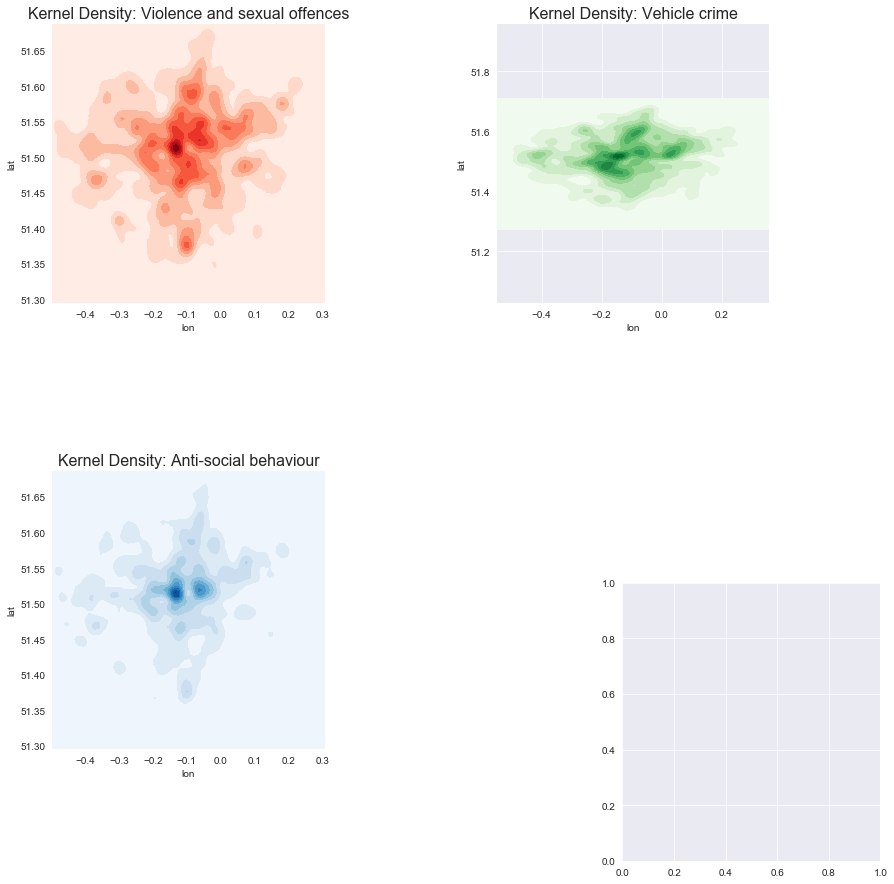

In [12]:
new_gdb = gpd.GeoSeries(nlst[['lon', 'lat']].apply(Point, axis=1), crs="+init=epsg:4326")
bbox = new_gdb.total_bounds
titles=["Kernel Density: "+in_type[i] for i in range(3)]
    
fig, axs = plt.subplots(2, 2, figsize = (12,12))

ax1 = plt.subplot2grid((8,8), (0,0), rowspan=3, colspan=3) 
ax2 = plt.subplot2grid((8,8), (4,0), rowspan=3, colspan=3)
ax3 = plt.subplot2grid((8,8), (0,4), rowspan=3, colspan=3)


fig.tight_layout(pad = 0.4, w_pad = 4.0, h_pad = 4.0)
ax1.set_title(titles[0], fontsize =16)
ax2.set_title(titles[1], fontsize =16)
ax3.set_title(titles[2], fontsize =16)

ax1.set_xlim(bbox[0], bbox[2])
ax1.set_ylim(bbox[1], bbox[3]) 
ax2.set_xlim(bbox[0], bbox[2])
ax2.set_ylim(bbox[1], bbox[3]) 
ax3.set_xlim(bbox[0], bbox[2])
ax3.set_ylim(bbox[1], bbox[3]) 

# ^The above code sets the x and y limits for each function. Without this, the density maps
# are very small and only take up about 20% of the graph space.
gdfnew1 = nlst[nlst['type']==in_type[0]]
gdfnew2 = nlst[nlst['type']==in_type[1]]
gdfnew3 = nlst[nlst['type']==in_type[2]]

sns.kdeplot(gdfnew1.lon, gdfnew1.lat, shade = True, cmap = "Reds", ax=ax1) 
sns.kdeplot(gdfnew2.lon, gdfnew2.lat, shade = True, cmap = "Blues", ax=ax2)
sns.kdeplot(gdfnew3.lon, gdfnew3.lat, shade = True, cmap = "Greens", ax=ax3)

sns.set(style = "whitegrid") # aesthetics
sns.despine(left=True) # aesthetics
sns.set_context("paper") # aesthetics
plt.axis('equal')
plt.show()   

In [13]:
# Set up geodataframe, initially with CRS = WGS84 (since that matches the lon and lat co-ordinates)
crs = {'init':'epsg:4326'}
geometry = [shapely.geometry.Point(xy) for xy in zip(crime_data['lon'], crime_data['lat'])]
geo_df = gpd.GeoDataFrame(crime_data,
                               crs = crs,
                               geometry = geometry)
# Convert geometry to OSGB36 EPSG: 27700
geo_df_new = geo_df.to_crs(epsg = 27700)
# convert the .csv file into .shp file 
geo_df_new.to_file(driver='ESRI Shapefile', filename='crime_data.shp')

The crime_data.csv file now has been saved as crime_data.shp file in your designated folder together with this notebook. 

You may also want to double check its CRS in QGIS, which is now with National Grid. We can plot the crime data on london basemap.

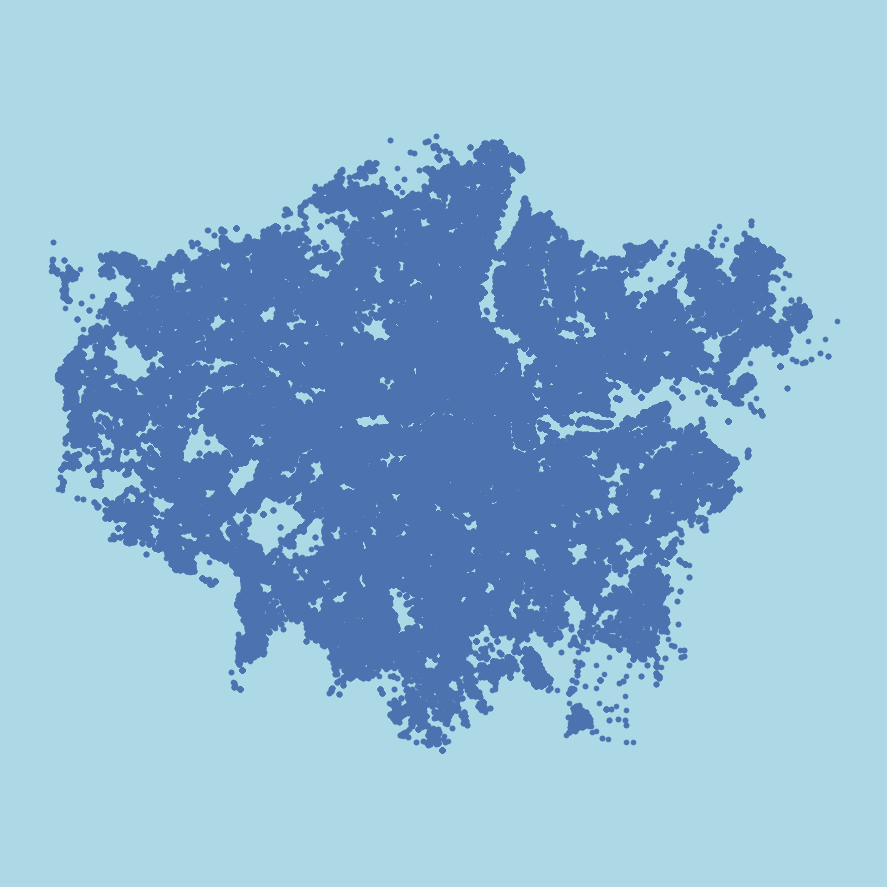

In [14]:
# Plot map
fig, ax = plt.subplots(1,
                       figsize = (12,12),
                       dpi = 72,
                       facecolor = 'lightblue')

ax.set_position([0,0,1,1])   # Puts axis to edge of figure
ax.set_axis_off()            # Turns axis off so facecolour applies to axis area as well as bit around the outside
ax.get_xaxis().set_visible(False)   # Turns the x axis off so that 'invisible' axis labels don't take up space
ax.get_yaxis().set_visible(False)
lims = plt.axis('equal')
geo_df_new.plot(ax=ax)
plt.show()

### <a id='Exercise 1'>Exercise 1</a>

In [15]:
# replace the ??? to present the top 4 rows of crime_data
crime_data.head(4)

,type,code,name,lat,lon,Month,geometry
0,Vehicle crime,E01003006,Kingston upon Thames 001A,51.42933,-0.31340,2018-01,POINT (-0.3134 51.42933)
1,Anti-social behaviour,E01003007,Kingston upon Thames 001B,51.42800,-0.30287,2018-01,POINT (-0.30287 51.428)
2,Anti-social behaviour,E01003007,Kingston upon Thames 001B,51.42800,-0.30287,2018-01,POINT (-0.30287 51.428)
3,Burglary,E01003007,Kingston upon Thames 001B,51.42688,-0.29595,2018-01,POINT (-0.29595 51.42688)


### <a id='Import London LSOA map'>4.4 Import London LSOA map</a>

C:\Users\k1801675\AppData\Local\Continuum\anaconda3\envs\gsa2018\lib\site-packages\geopandas\plotting.py:389: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


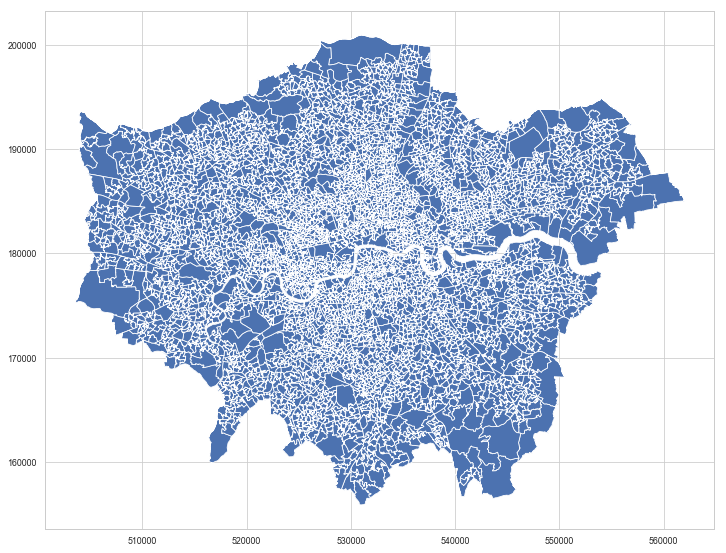

In [16]:
# draw the LSOA map and set its Coordinate Reference Systems (CRS) into EPSG: 27700.
lsoa=gpd.read_file('LSOA_IMD2015.shp')
f, ax = plt.subplots(1, figsize=(12, 12))
ax = lsoa.plot(axes=ax);
lsoa.crs = {'init' :'epsg:27700'}
plt.show()

In [17]:
# check the lsoa is a GeoDataFrame
type(lsoa)

geopandas.geodataframe.GeoDataFrame

In [18]:
# check the labels for columns in lsoa
lsoa.columns

Index(['objectid', 'lsoa11cd', 'lsoa11nm', 'lsoa11nmw', 'st_areasha',
       'st_lengths', 'IMD2015_LS', 'IMD2015__1', 'IMD2015_Lo', 'IMD2015_In',
       'IMD2015__2', 'IMD2015_Em', 'IMD2015_Ed', 'IMD2015_He', 'IMD2015_Cr',
       'IMD2015_Ba', 'IMD2015_Li', 'IMD2015__3', 'IMD2015__4', 'IMD2015_Ch',
       'IMD2015_Ad', 'IMD2015_Ge', 'IMD2015_Wi', 'IMD2015__5', 'IMD2015_Ou',
       'IMD2015_To', 'IMD2015_De', 'IMD2015_Po', 'IMD2015_Ol', 'IMD2015_Wo',
       'geometry'],
      dtype='object')

In [19]:
# make the columns for LSOA data more readable
# rename the indicator with full title to help you interpret the columns/indicators
lsoa.drop(['objectid', 'lsoa11nmw','st_areasha', 'st_lengths', 'IMD2015_LS', 'IMD2015__1', 'IMD2015_Lo'], inplace=True, axis=1)
colnames2 = ['code','name','IMDindex','Income','Employment','Education', 'Health','Subcrime','BarriersHou','LivEnviron','Affect_child', 'Affect_old', 'child_young','Adult_skill','Geobarrier','widerbarrier','indoors', 'outdoors','population','depend_child', 'peo_middle', 'peo_over60', 'work_age','geometry']
lsoa.columns = colnames2
lsoa.head(4)

,code,name,IMDindex,Income,Employment,Education,Health,Subcrime,BarriersHou,LivEnviron,...,Geobarrier,widerbarrier,indoors,outdoors,population,depend_child,peo_middle,peo_over60,work_age,geometry
0,E01000001,City of London 001A,6.063,0.011,0.015,0.021,-1.918,-1.649,27.134,34.502,...,-0.233,2.690,0.382,1.201,1469,133,919,417,956.50,"POLYGON ((532095.5630000001 181577.3509999998,..."
1,E01000002,City of London 001B,6.255,0.012,0.017,0.040,-1.931,-1.692,26.358,37.106,...,-0.208,2.523,0.742,0.806,1469,164,882,423,920.25,"POLYGON ((532267.7280000001 181643.7809999995,..."
2,E01000003,City of London 001C,19.548,0.105,0.088,9.612,0.321,-0.987,31.861,48.337,...,-0.392,3.726,0.651,1.913,1421,124,964,333,945.25,"POLYGON ((532105.3119999999 182010.5739999991,..."
3,E01000005,City of London 001E,26.005,0.217,0.144,15.045,0.050,-0.831,35.104,34.811,...,-1.284,4.761,0.123,1.583,1014,166,672,176,699.00,"POLYGON ((533610.9740000004 181410.9680000003,..."


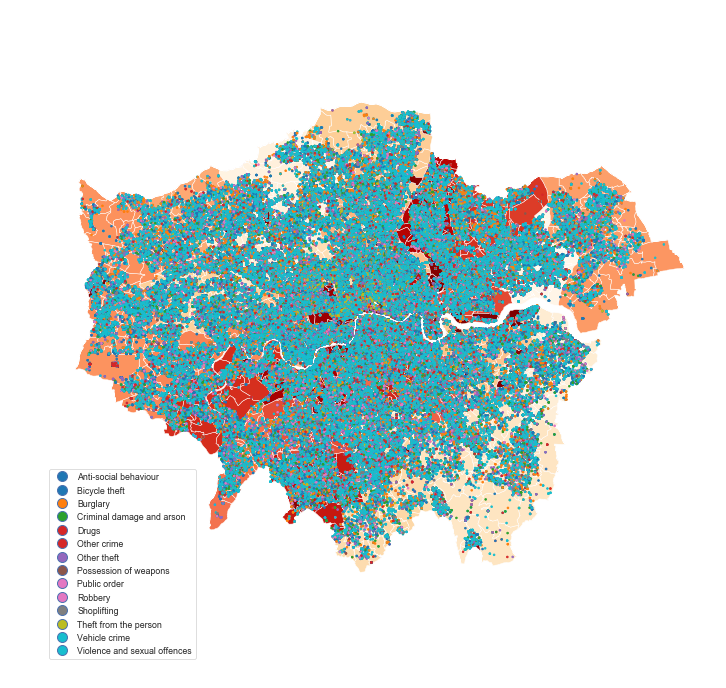

In [20]:
# to visulize both crime points data and lsoa vector data on a map
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_axis_off()
plt.axis('equal')
lsoa.plot(ax=ax, cmap='OrRd', linewidth=0.5, edgecolor='white')
geo_df_new.plot(column='type', markersize=3, categorical=True, legend=True, ax=ax)
# the legend was set by default to take the first column as labels.

### <a id='Exercise 2'>Exercise 2</a>

C:\Users\k1801675\AppData\Local\Continuum\anaconda3\envs\gsa2018\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


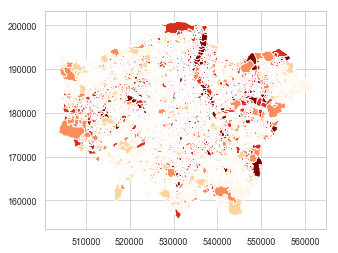

In [21]:
# This is an example for you to follow on
# Make a Choropleth maps on the deprivation index.
lsoa.plot(column='IMDindex', cmap='OrRd', scheme='quantiles')

C:\Users\k1801675\AppData\Local\Continuum\anaconda3\envs\gsa2018\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


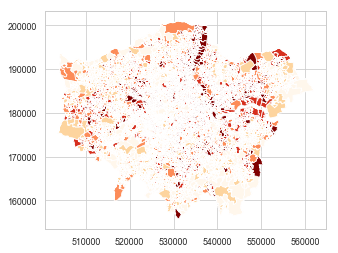

In [22]:
# Please plot series quantile map for 3 sub domain of deprivation indexes you want to explore
# e.g. Income, Employment, Education, etc.
# Your code here
lsoa.plot(column='Income', cmap='OrRd', scheme='quantiles')

C:\Users\k1801675\AppData\Local\Continuum\anaconda3\envs\gsa2018\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


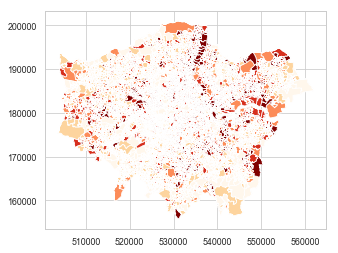

In [23]:
lsoa.plot(column='Employment', cmap='OrRd', scheme='quantiles')

C:\Users\k1801675\AppData\Local\Continuum\anaconda3\envs\gsa2018\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


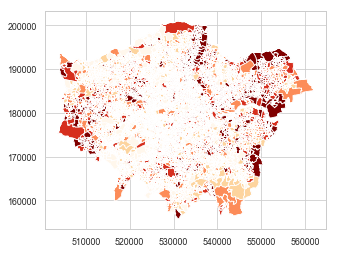

In [24]:
lsoa.plot(column='Education', cmap='OrRd', scheme='quantiles')

## <a id='Crime Hospots Detection'>5 Crime Hospots Detection</a>

### <a id='Heatmap'>5.1 Heatmap</a>

We use function in Folium to generate crime heatmap. This does not take Dataframes. 
You'll need to give it a list of lats, lons, i.e. a list of lists. NaNs will also trip it up.

Because Internet Explorer doesn't recognize the heatmap, your output maybe blank, so we need to configurate your brower at the beginning. 
For other browsers like Chrome, it works well; so does Safari on Mac.

In [25]:
# Ensure you're handing it floats
crime_data['lat'] = crime_data['lat'].astype(float)
crime_data['lon'] = crime_data['lon'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
heat_df = crime_data[['lat', 'lon']]
heat_df = heat_df.dropna(axis=0, subset=['lat','lon'])

# List comprehension to make out list of lists
heat_data = [[row['lat'],row['lon']] for index, row in heat_df.iterrows()]

heatmap_map = folium.Map([51.50632, -0.1271448], zoom_start=12)

# Plot it on the map
hm=plugins.HeatMap(heat_data)
heatmap_map.add_child(hm)
# You save a map as an html file 
heatmap_map.save("heatmap.html")

### <a id='Exercise 3'>Exercise 3</a>
Please try zoom in and zoom out on the heatmap, and save your screenshot of the crime heatmap around Strand Campus to your folder as a .jpg or .png.

### <a id='Hotspots Detection'>5.2 Hotspots Detection</a>

To detect the hotspots, the first step is to calculate how many crime cases happened in each LSOA, this operation is similar to "Points in Polygon" operation in QGIS.

In [26]:
# calculating total number of crime incidents per lsoa
crime_data2 = pd.DataFrame(crime_data['code'].value_counts().astype(float))
crime_data2 = crime_data2.reset_index()
crime_data2.columns = ['code','Numbers']
crime_data2.head(4)

,code,Numbers
0,E01033595,3863.0
1,E01004734,3163.0
2,E01004763,2742.0
3,E01002444,2014.0


In [27]:
# add a new column of crime incidents number in each lsoa 
# by join lsoa and crime_data2 through attribute join
lsoa = lsoa.merge(crime_data2, on='code')
# save this newly joined .csv file into .shp file
lsoa.to_file(driver='ESRI Shapefile', filename='lsoa_numbers.shp')

####  Choropleth map

When you check the columns of lsoa file, you may find a new column "Numbers" has been added at the end.

C:\Users\k1801675\AppData\Local\Continuum\anaconda3\envs\gsa2018\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


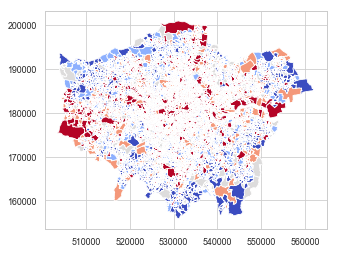

In [28]:
# Make a Choropleth map on crime incidents per lsoa.
lsoa.plot(column='Numbers', cmap='coolwarm', scheme='quantiles')

We implement Local Indicators of Spatial Association (LISAs) for Moran’s I and Getis and Ord’s G in PySal to detect hotspots.

### <a id='Spatial Autocorrelation: Moran I'>5.2.1 Spatial Autocorrelation: Moran's I </a>

We use Local Moran's I index as follows:
<img src="https://pysal.readthedocs.io/en/latest/_images/math/cc923c0bc2d82aabdd5b8752dcde645777a6a2bd.png" alt="Drawing" style="width: 200px;"/>

to test the spatial autocorrelationality. It will measure the spatial autocorrelation in an attribute y measured over n spatial units. To calculate Moran’s I we first need to create and read in a GAL file for a weights matrix W. In order to get W, we need to work out what polygons neighbour each other (e.g. Queen Style Contiguity Neighbours, and Rook's Case Neighbours, etc.). 

Read more in R.Bivand (2017) "Finding Neighbours".

Normally, we use Rook and Queen contiguity weight matrix. Rook weights consider observations as neighboring only when they share an edge; while queen contigutiy weight reflects adjacency relationships whether or not a polygon shares an edge or a vertex with another polygon. They may be different, depending on how the observation and its nearby polygons are configured.

In [29]:
# Generate weights matrix based on the kernel weights among lsoas. 
# We use Rook case for example.
# You are encouraged to try Queen case and compare the results.
w = pysal.queen_from_shapefile("lsoa_numbers.shp")
w.transform = 'r'

The y attribute should be read from DataFrame, which is actually the same "lsoa". However, we tried to produce a dataframe from shapefile to keep them consistent from the same shapefile.

In [30]:
dataframe = pysal.pdio.read_files("lsoa_numbers.shp")
y = np.array(dataframe['Numbers'])
yI=pysal.Moran_Local(y,w,permutations=9999)
yI.p_sim.shape

(4833,)

We have an array of local I statistics stored in the .Is attribute, and p-values from the simulation stored in p_sim.

In [31]:
yI.Is[0:20], yI.p_sim[0:20]

(array([ 0.04379626, -0.58412798, -0.62744752, -0.30193693, -0.0214585 ,
         1.15541934,  0.45979003,  0.3668098 ,  1.04219069, -0.12874307,
         0.01189012,  0.06403983,  0.01589926, -0.07890136,  0.01881284,
         0.08655025,  0.00829487,  0.03633448,  0.09008739,  0.01604011]),
 array([0.4396, 0.04  , 0.0345, 0.0194, 0.2853, 0.0204, 0.024 , 0.03  ,
        0.154 , 0.1101, 0.2457, 0.203 , 0.4624, 0.1588, 0.4111, 0.3371,
        0.4092, 0.447 , 0.1089, 0.491 ]))

To visualize the distribution of Moran's I, we can use LISA statistics to present the Moran Scatterplot.

In order to do this, we need firstly construct the spatial lag of the covariate:

In [32]:
lag_y = pysal.lag_spatial(w,y)
sigs = y[yI.p_sim <= .001]
w_sigs = lag_y[yI.p_sim <= .001]
insigs = y[yI.p_sim > .001]
w_insigs = lag_y[yI.p_sim > .001]

We can make LISA map for the data

In [33]:
b,a = np.polyfit(y, lag_y, 1)
 # Calculate the global Moran's I index
I_y = pysal.Moran(y, w, two_tailed=False)

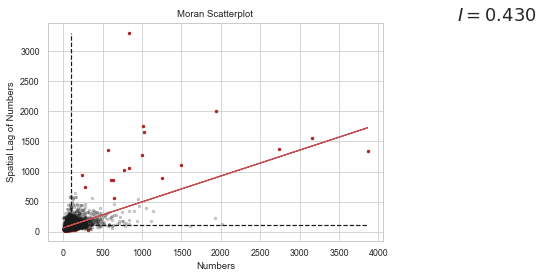

In [34]:
plt.plot(sigs, w_sigs, '.', color='firebrick')
plt.plot(insigs, w_insigs, '.k', alpha=.2)
 # dashed vert at mean of the last year's PCI
plt.vlines(y.mean(), lag_y.min(), lag_y.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(lag_y.mean(), y.min(), y.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(y, a + b*y, 'r')
plt.title('Moran Scatterplot')
plt.text(s='$I = %.3f$' % I_y.I, x=5000, y=3500, fontsize=18)
plt.ylabel('Spatial Lag of Numbers')
plt.xlabel('Numbers')
plt.show()

To identify the significant LISA values we can use numpy indexing:

In [35]:
sig = yI.p_sim < 0.05
sig.sum()

1029

and then use this indexing on the q attribute to find out which quadrant of the Moran scatter plot each of the significant values is contained in:

In [36]:
yI.q[sig]

array([2, 2, 2, ..., 1, 2, 1])

### <a id='Local G and G*'>5.2.2 Local G and G*</a>

Local Getis and Ord’s G can be calculated through:

<img src="https://pysal.readthedocs.io/en/latest/_images/math/fece4a8c588292de518756420edb4807157c0af4.png" style="width: 200px;"/>

<img src="https://pysal.readthedocs.io/en/latest/_images/math/e1fcb78553d9f351b1b50556cb96a3c68e7b0af8.png" style="width: 200px;"/>

Here we just calculate G for example, and you can try to exercise with G* by yourself

In [37]:
from pysal.esda.getisord import G_Local
lg = G_Local(y,w)
lg.n

4833

In [38]:
lg.p_sim

array([0.448, 0.043, 0.03 , ..., 0.37 , 0.232, 0.083])

To identify the significant G index values we can use numpy indexing:

In [39]:
sig = lg.p_sim<0.05
lg.p_sim[sig]

array([0.043, 0.03 , 0.015, ..., 0.035, 0.032, 0.037])

### <a id='Map the Hotspots'>5.2.3 Map the Hotspots</a>

In [40]:
# Hot spots 
# High value with high-valued neighbours.
hotspots = yI.q==1 * sig
hotspots.sum()

277

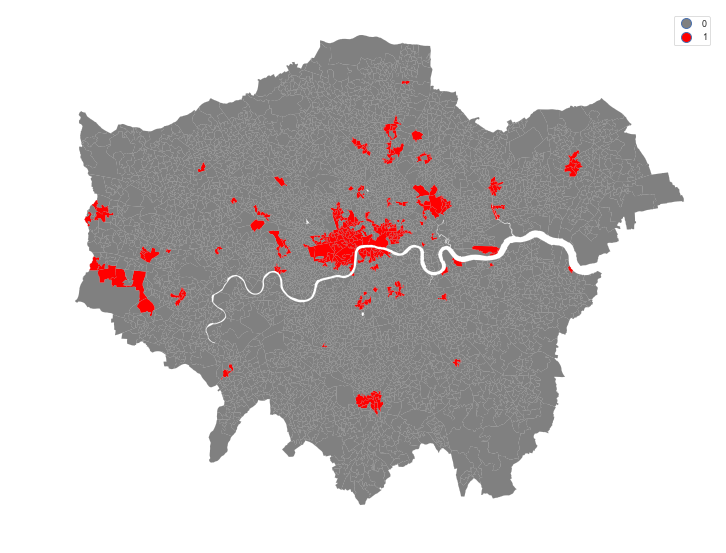

In [41]:
# Plot the map of hotspots 
tx = gpd.read_file("lsoa_numbers.shp")
hmap = matplotlib.colors.ListedColormap(['grey', 'red'])
f, ax = plt.subplots(1, figsize=(12, 12))
tx.assign(cl=hotspots*1).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='grey', legend=True)
ax.set_axis_off()
plt.show()

### <a id='Exercise 4'>Exercise 4</a>

Similarly, we can try to detect the coldspots which are low values with low-valued neighbours. Please replace the ??? below to complete the detection of coldspots.

In [42]:
# Cold spots
coldspots = yI.q==3 * sig
coldspots.sum()

565

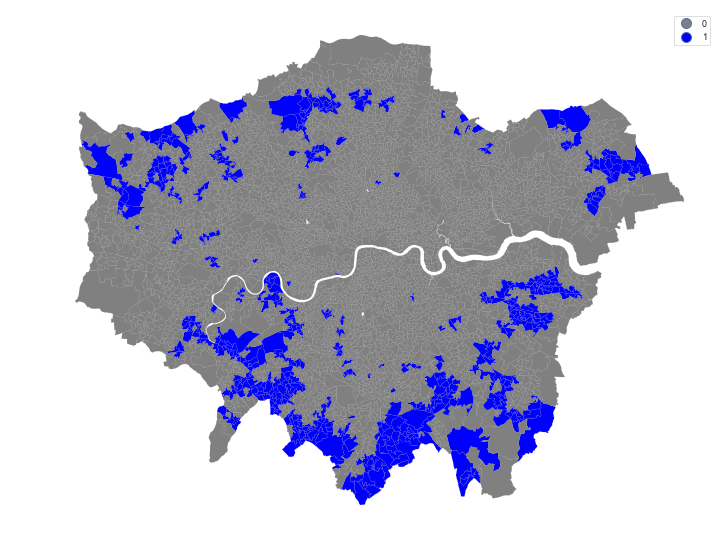

In [43]:
# Plot the map of coldspots 
tx = gpd.read_file("lsoa_numbers.shp")
hmap = matplotlib.colors.ListedColormap(['grey', 'blue'])
f, ax = plt.subplots(1, figsize=(12, 12))
tx.assign(cl=coldspots*1).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='grey', legend=True)
ax.set_axis_off()
plt.show()

## <a id='Spatial Regression'>6 Spatial Regression</a>

### <a id='Nonspatial Regression - Ordinary Least Squares (OLS) Regression'>6.1 Nonspatial Regression - Ordinary Least Squares (OLS) Regression</a> 
Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent (target) and independent variable (s) (predictor). 

This technique is used for forecasting, time series modelling and finding the influential effect relationship between the variables.

This will allow us, not only to set up the model and try to interpret the coefficients, which is the basis for spatial models; but also will provide a baseline model for evaluating the spatial extensions' strength.

In this example, we will be analyzing Numbers with relation to Income, Employment, LivEnviron and peo_middle by lsoa.

In [44]:
# Read in the Numbers (dependent variable) into an array y 
# and the value for Income, Employment, LivEnviron and population (independent variables) 
# into a one dimmensional array X.
f = pysal.open("lsoa_numbers.dbf",'r')
y = np.array(f.by_col['Numbers'])
y.shape = (len(y),1)
X= []
X.append(f.by_col['Income'])
X.append(f.by_col['Employment'])
X.append(f.by_col['LivEnviron'])
X.append(f.by_col['peo_middle'])
X = np.array(X).T

Now that we have stored the values for analyzing, we can perform ordinary least squares (OLS) regression. 

This is done with the pysal.spreg module. We will use ls.summary to obtain of full summary of the results.

In [45]:
lrs = ols.OLS(y, X, name_y = 'Numbers', name_x = ['Income', 'Employment','LivEnviron', 'peo_middle'], name_ds = 'lsoa_numbers')
print(lrs.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :lsoa_numbers
Weights matrix      :        None
Dependent Variable  :     Numbers                Number of Observations:        4833
Mean dependent var  :    103.6892                Number of Variables   :           5
S.D. dependent var  :    138.4868                Degrees of Freedom    :        4828
R-squared           :      0.1857
Adjusted R-squared  :      0.1851
Sum squared residual:75459029.092                F-statistic           :    275.3127
Sigma-square        :   15629.459                Prob(F-statistic)     :  1.759e-213
S.E. of regression  :     125.018                Log likelihood        :  -30191.158
Sigma-square ML     :   15613.290                Akaike info criterion :   60392.317
S.E of regression ML:    124.9531                Schwarz criterion     :   60424.733

-----------------------------------------------------------------------------

OLS regression assumes that each observation is independent from all others. 
However, in real urban context, First Law of Geography indicates that places near to each other are not likely to be independent; they might spatially depend on each other.

We can evaluate spatial autocorrelation in the residuals with Moran’s I test, with the first step to create a spatial weights matrix (we've already created w.gal in hotspots detection procedure). 

### <a id='Spatial Autocorrelation Test ：Moran I'>6.2 Spatial Autocorrelation Test ：Moran’s I</a>

We will use Moran's I tool to check for spatial autocorrelation in the residuals generated from the OLS model 
to determine if geographically weighted regression might be appropriate for the data.



In [46]:
mi = pysal.Moran(y, w, two_tailed=False)
print("The Statistic Moran's I is: "+str("%.4f"%mi.I),
      "\nThe Expected Value for Statistic I is: "+str("%.4f"%mi.EI),
      "\nThe Significance Test Value is: "+str("%.4f"%mi.p_norm))

The Statistic Moran's I is: 0.4299 
The Expected Value for Statistic I is: -0.0002 
The Significance Test Value is: 0.0000


 ### <a id='Spatial Autocorrelation Test ：Geary C'>6.3 Spatial Autocorrelation Test ：Geary's C</a>
 
 We can also use Geary's C for test, have a try below.

In [47]:
gc = pysal.Geary(y, w)
print("The Statistic C is: "+str("%.3f"%gc.C),
      "\nThe Expected Value for Statistic C is: "+str(gc.EC),
      "\nThe Significance Test Value for Normal Frequency Distribution is: "+str("%.3f"%gc.z_norm))

The Statistic C is: 0.702 
The Expected Value for Statistic C is: 1.0 
The Significance Test Value for Normal Frequency Distribution is: -32.602


### <a id='Spatial Regression - Spatial Error Model'>6.4 Spatial Regression - Spatial Error Model</a>

Now, we can use a spatial regression model to account for spatial non-independence. The spreg module has several different functions for creating a spatial regression model. 

Firstly, we will try the spatial error model estimation with maximum likelihood.

In [48]:
spat_err = ml_error.ML_Error(y, X, w, 
                             name_y='Numbers', name_x=['Income', 'Employment','LivEnviron', 'peo_middle'], 
                             name_w='w.gal', name_ds='lsoa_numbers')
print(spat_err.summary)

C:\Users\k1801675\AppData\Local\Continuum\anaconda3\envs\gsa2018\lib\site-packages\scipy\optimize\_minimize.py:763: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :lsoa_numbers
Weights matrix      :       w.gal
Dependent Variable  :     Numbers                Number of Observations:        4833
Mean dependent var  :    103.6892                Number of Variables   :           5
S.D. dependent var  :    138.4868                Degrees of Freedom    :        4828
Pseudo R-squared    :      0.1841
Sigma-square ML     :   11723.266                Log likelihood        :  -29639.644
S.E of regression   :     108.274                Akaike info criterion :   59289.288
                                                 Schwarz criterion     :   59321.704

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

### <a id='Spatial Regression - Spatial Lag Model'>6.5 Spatial Regression - Spatial Lag Model</a>

Secondly, we will try the spatial lag model estimation with maximum likelihood.

In [49]:
spat_lag = ml_lag.ML_Lag(y, X, w, 
                             name_y='Numbers', name_x=['Income', 'Employment','LivEnviron', 'peo_middle'], 
                             name_w='w.gal', name_ds='lsoa_numbers')
print(spat_lag.summary)

C:\Users\k1801675\AppData\Local\Continuum\anaconda3\envs\gsa2018\lib\site-packages\scipy\optimize\_minimize.py:763: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :lsoa_numbers
Weights matrix      :       w.gal
Dependent Variable  :     Numbers                Number of Observations:        4833
Mean dependent var  :    103.6892                Number of Variables   :           6
S.D. dependent var  :    138.4868                Degrees of Freedom    :        4827
Pseudo R-squared    :      0.3770
Spatial Pseudo R-squared:  0.1731
Sigma-square ML     :   12024.111                Log likelihood        :  -29679.992
S.E of regression   :     109.655                Akaike info criterion :   59371.984
                                                 Schwarz criterion     :   59410.884

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

### <a id='Exercise 5'>Exercise 5</a>

Please try to interpret the regression summary for different models, and send your results to module lead.

# Congratulations for completion!